© 2018 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](central_limit_theory.ipynb).
___

# Objective 

In this tutorial, we will discuss what the central limit theorem is and illustrate it through a computational simulation. This exercise helps illuminate why "bell curve" distributions occur so frequently. 

# The central limit theorem 

The central limit theorem states that when multiple independent random variables are averaged, the resulting averages will tend toward a normal distribution even if the original random variables were not themselves normally distributed. Stated this way might seem a bit obscure, but this theorem explains while many measurements that we might make (like the height of people) are distributed in the iconic “bell curve.” This is because such values can be the result of many other variables like genetics, environment, and diet. 

While taking repeated measurements in the lab can often be quite onerous, we can computationally simulate the process of repeated measurements quite easily and see the central limit theorem in action! 

# Producing random variables

In [1]:
# Import the necessary modules
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

To produce random variables we will make use of numpy's `random.random()` function that produces a random number between $0$ and $1$. Let's see it in action by printing a few random numbers:

In [2]:
for i in range(5):
    print(np.random.random())

0.0798823257304101
0.6076235897466303
0.6703376415508842
0.20688023261091737
0.9436808856424503


Let's plot a histogram for a lot of these randomly chosen variables to see how they are distirbuted. To quickly produce many random variables, we can use a single-line `for` loop, which takes the form of `[function() for i in range(num_trials)]`. This `for` loop will create a list of length `num_trials`, where each item in the list is the result of `function()` being excuted. 

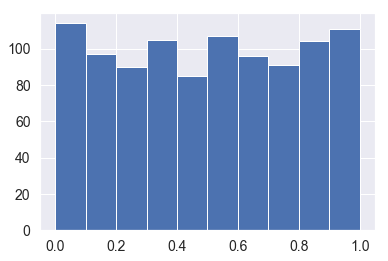

In [3]:
# produce a list of 1000 random variables 
rand_vars = [np.random.random() for i in range(1000)]
_ = plt.hist(rand_vars) # the _ prevents some default output from being printed

We see that these random variables are uniformly distributed, which makes sense given that we selected numbers from `0` to `1` in an unbiased manner. Importantly, these variables are *not* normally distributed, which makes them serve as ideal candidates for illustrating the central limit theorem. To this end, let's repeatedly draw 10 random numbers from this uniform distribution, average them, and plot the histogram of many of these averages. 

# Illustrating the central limit theorem with uniformly distributed variables

Text(0,0.5,'frequency')

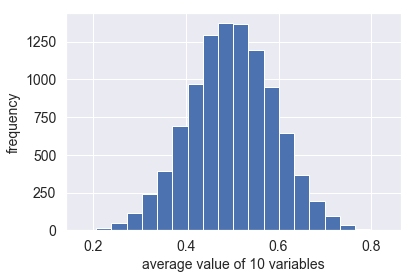

In [4]:
# specify the number of trials to be done
num_trials = 10000

# initalize array in which to store averages
avgs = np.zeros(num_trials)

# for num_trials times, get 10 random numbers and average them
for i in range(num_trials):
    rand_vars = [np.random.random() for i in range(10)]
    avg = np.mean(rand_vars)
    avgs[i] = avg

_ = plt.hist(avgs, bins=20)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency")

And we've found the bell curve! We've shown that even though the original variables were drawn from a uniform distribution, repeated trails of averaging these variables resulted in a normal distribution. To better see this, let's overlay a normal distribution on top of the histogram.

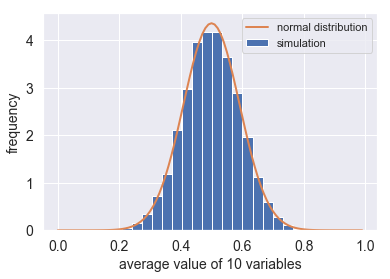

In [7]:
# specify range of x-values to be covered by normal distribution
x_vals = np.arange(0,1,0.01)

# determine standard deviation that should be used for the normal distribtuion 
std = np.std(avgs) 

# use scipy's built in normal pdf 
normal_pdf = stats.norm.pdf(x_vals, loc=0.5, scale=std)

# plot the two distributions 
_ = plt.hist(avgs, bins=20, density=True) # setting the density variable normalizes the distribution
plt.plot(x_vals, normal_pdf)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency")
plt.legend(["normal distribution", "simulation"])

Definitely looks normal!